In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Importing Dataset - MNIST

In [6]:
data_mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data_mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
print(f"Number of training examples = {len(X_train)}")
print(f"Number of testing examples = {len(X_test)}")
print(X_train[0].shape) #The images are of 28x28 pixels and each cell shows the brightness value of 255

Number of training examples = 60000
Number of testing examples = 10000
(28, 28)


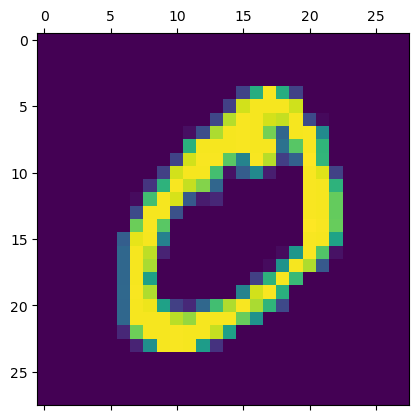

In [17]:
plt.matshow(X_train[1]) #Using matshow to represent 2d matrix as a visualisation

## Flattening our dataset
---
This is needed in order to use the brightness values in input layer

In [28]:
# Using pandas to reshape the dataset

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
from keras import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(10, activation='sigmoid') #Look upon this -> use 'linear'
])

In [ ]:
from keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True), #Note: Using this
)